# Mooring Synthesis of Initial NC data (offline)

## 21BS-4A

- from netcdf files
- plot all depths of each parameter on each other for comparative purposes
- Temperature, Salinity, Pressure in this notebook.  See companion for Oxygen, Chlor, ADCP/currents, etc

In [1]:
import xarray as xa
import pandas as pd
import numpy as np
import cmocean

In [2]:
#wrap the plot in image settings for visual appeal
# may be able to make this cleaner or just a preset
%run '../../../settings/mpl_plot_settings.py'

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


In [3]:
ncfiles = '/Users/bell/ecoraid/2021/Moorings/21bs4a/final_data_cf/21bs4*.nc'
# ncfiles = '*.nc'

mfd = xa.open_mfdataset(ncfiles,chunks=None)
mfd

/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/dask/array/core.py:4996: PerformanceWarning: Increasing number of chunks by factor of 15
  result = blockwise(
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/dask/array/core.py:4996: PerformanceWarning: Increasing number of chunks by factor of 15
  result = blockwise(
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/dask/array/core.py:4996: PerformanceWarning: Increasing number of chunks by factor of 15
  result = blockwise(
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/dask/array/core.py:4996: PerformanceWarning: Increasing number of chunks by factor of 15
  result = blockwise(
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/dask/array/core.py:4996: PerformanceWarning: Increasing number of chunks by factor of 15
  result = blockwise(
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/dask/array/core.py:4996: PerformanceWarning: Increasing number of chunks 

<xarray.Dataset> Size: 424MB
Dimensions:             (time: 698138, latitude: 1, longitude: 1, depth: 15)
Coordinates:
  * time                (time) datetime64[ns] 6MB 2021-05-08T20:53:00 ... 202...
  * latitude            (latitude) float64 8B 57.87
  * longitude           (longitude) float64 8B -168.9
  * depth               (depth) float64 120B 10.5 13.0 16.0 ... 53.0 58.0 65.0
Data variables:
    chlor_fluorescence  (time, depth, latitude, longitude) float64 84MB dask.array<chunksize=(10807, 1, 1, 1), meta=np.ndarray>
    temperature         (time, depth, latitude, longitude) float64 84MB dask.array<chunksize=(11636, 1, 1, 1), meta=np.ndarray>
    salinity            (time, depth, latitude, longitude) float64 84MB dask.array<chunksize=(11636, 1, 1, 1), meta=np.ndarray>
    conductivity        (time, depth, latitude, longitude) float64 84MB dask.array<chunksize=(11636, 1, 1, 1), meta=np.ndarray>
    pressure            (time, depth, latitude, longitude) float64 84MB dask.array<chunksize=(69814, 1, 1, 1), meta=np.ndarray>
Attributes: (12/15)
    Latitude_DegMMddW:                      57 51.99 N
    Longitude_DegMMddN:                     168 52.83 W
    MooringID:                              21BS-4A
    platform_deployment_date:               2021-05-08T20:53:00Z
    platform_deployment_cruise_name:        DY2103
    platform_recovery_date:                 2022-09-05T16:30:00Z
    ...                                     ...
    InstrumentSerialNumber:                 158
    InstrumentType:                         Eco-Fluorometer FLSB
    date_created:                           2022-09-28T07:51:15Z
    date_modified:                          2022-11-15 16:51:41.158302
    QC_indicator:                           ProbablyGood
    history:                                Trimmed to deployment.\nTrimmed t...

## Temperature (full temporal resolution)

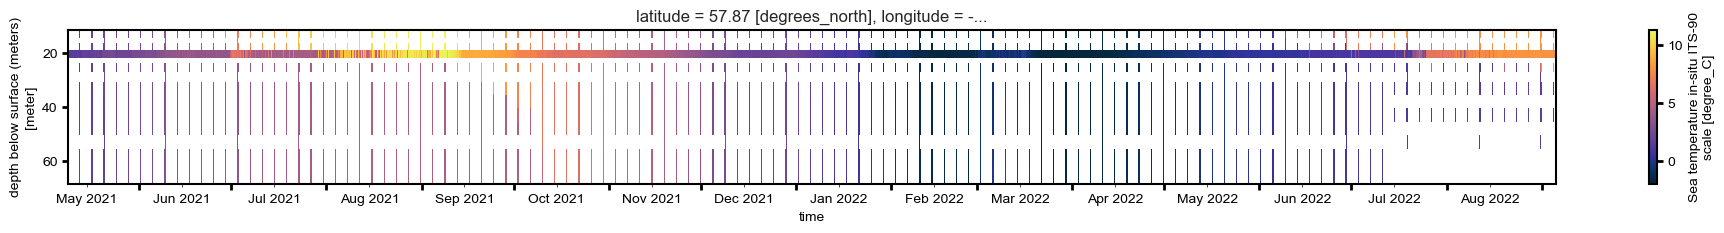

In [9]:
upper_temp = mfd.temperature.max(axis=0).max(axis=0).values
lower_temp = -2

fig, ax = plt.subplots(1,figsize=(24, 2))
mfd.temperature.T.plot(ax=ax,yincrease=False,vmin=lower_temp,vmax=upper_temp,cmap=cmocean.cm.thermal)


ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

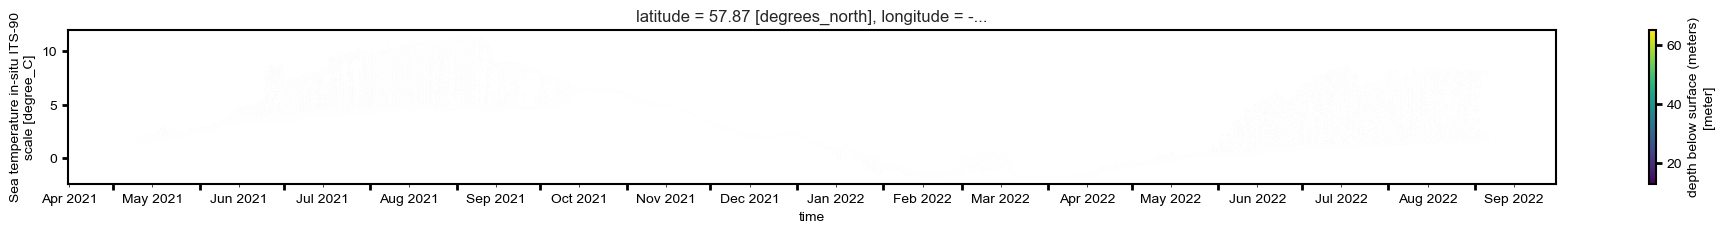

In [10]:
fig, ax = plt.subplots(1,figsize=(24, 2))
mfd.isel(latitude=0,longitude=0).plot.scatter(x="time",y="temperature",hue="depth",s=1,ax=ax)


ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

**Note:** not everything has constant sample frequencies so if nan's are in the mix, then lineplots are less useful (see plot below)
Will want to resample to hourly or daily to evaluate those

/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


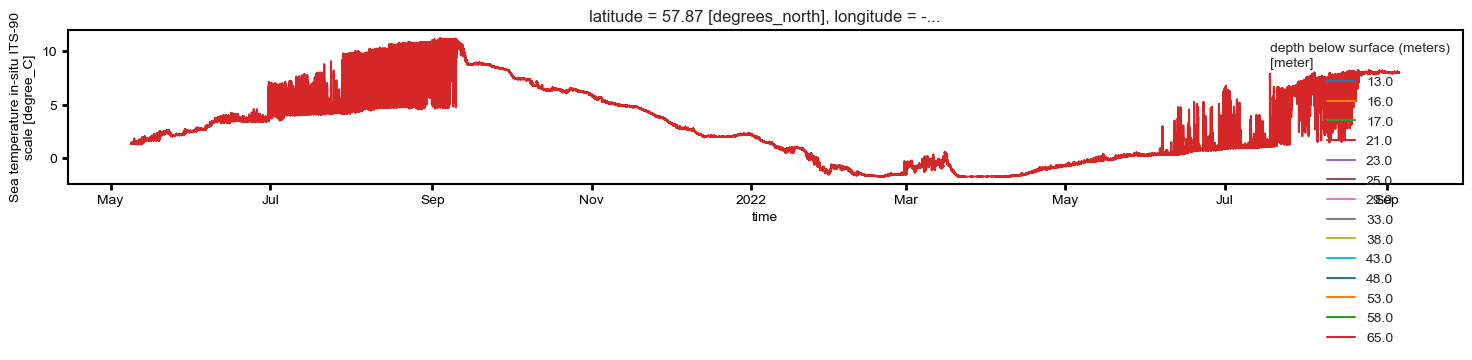

In [11]:
fig, ax = plt.subplots(1,figsize=(18, 2))
mfd.temperature.isel(latitude=0,longitude=0).plot.line(x="time",hue="depth",ax=ax);


## Salinity(full temporal resolution)

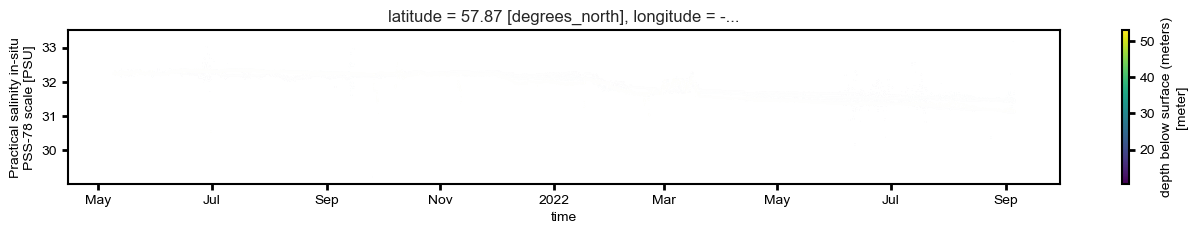

In [4]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd.isel(latitude=0,longitude=0).plot.scatter(x="time",y="salinity",hue="depth",s=1,ax=ax)

In [8]:
mfd.isel(latitude=0,longitude=0)

<xarray.Dataset> Size: 424MB
Dimensions:             (time: 698138, depth: 15)
Coordinates:
  * time                (time) datetime64[ns] 6MB 2021-05-08T20:53:00 ... 202...
    latitude            float64 8B 57.87
    longitude           float64 8B -168.9
  * depth               (depth) float64 120B 10.5 13.0 16.0 ... 53.0 58.0 65.0
Data variables:
    chlor_fluorescence  (time, depth) float64 84MB dask.array<chunksize=(10807, 1), meta=np.ndarray>
    temperature         (time, depth) float64 84MB dask.array<chunksize=(11636, 1), meta=np.ndarray>
    salinity            (time, depth) float64 84MB dask.array<chunksize=(11636, 1), meta=np.ndarray>
    conductivity        (time, depth) float64 84MB dask.array<chunksize=(11636, 1), meta=np.ndarray>
    pressure            (time, depth) float64 84MB dask.array<chunksize=(69814, 1), meta=np.ndarray>
Attributes: (12/15)
    Latitude_DegMMddW:                      57 51.99 N
    Longitude_DegMMddN:                     168 52.83 W
    MooringID:                              21BS-4A
    platform_deployment_date:               2021-05-08T20:53:00Z
    platform_deployment_cruise_name:        DY2103
    platform_recovery_date:                 2022-09-05T16:30:00Z
    ...                                     ...
    InstrumentSerialNumber:                 158
    InstrumentType:                         Eco-Fluorometer FLSB
    date_created:                           2022-09-28T07:51:15Z
    date_modified:                          2022-11-15 16:51:41.158302
    QC_indicator:                           ProbablyGood
    history:                                Trimmed to deployment.\nTrimmed t...

## Pressure (full temporal resolution)

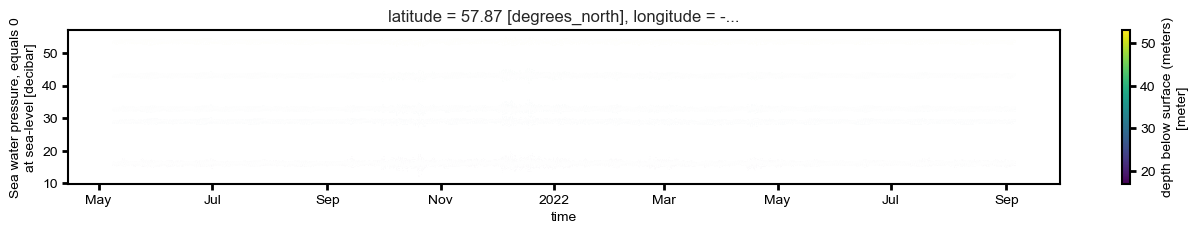

In [15]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd.isel(latitude=0,longitude=0).plot.scatter(x="time",y="pressure",hue="depth",s=1,ax=ax)

## Hourly/Interpolated plots Plots

Because of the different timebases... quickly either interpolate (linearly) or downsample (this seems slower) to plot all series

In [29]:
# mfd_hourly = mfd.resample(time='1H').median() #not fast
mfd_up = (mfd.chunk(dict(time=-1)).interpolate_na("time"))

/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/groupers.py:498: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(
IOStream.flush timed out


/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


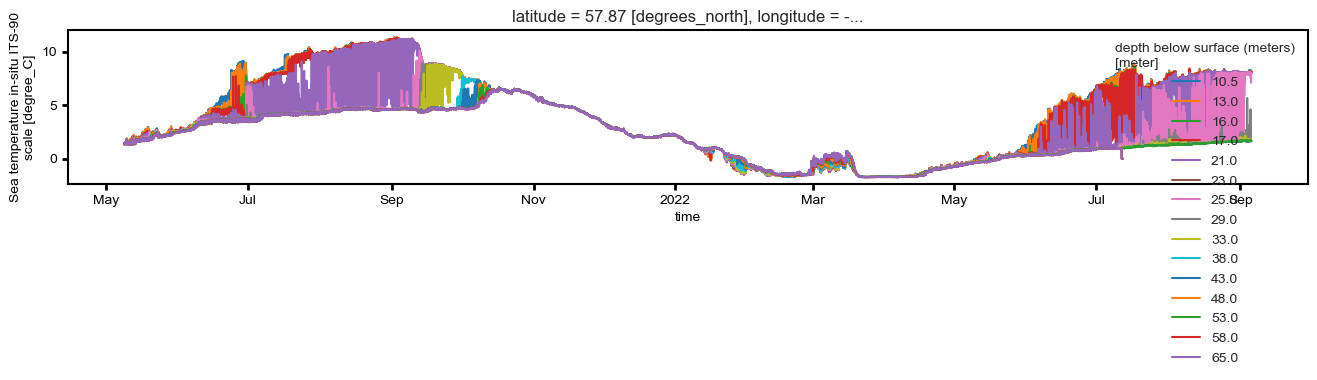

In [20]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd_up.temperature.plot(x="time",hue="depth",ax=ax);

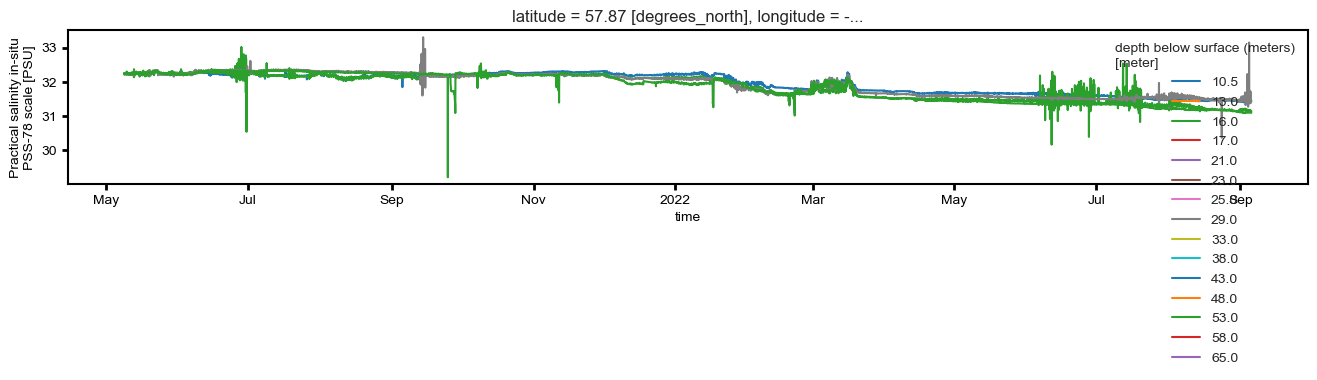

In [21]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd_up.salinity.plot(x="time",hue="depth",ax=ax);

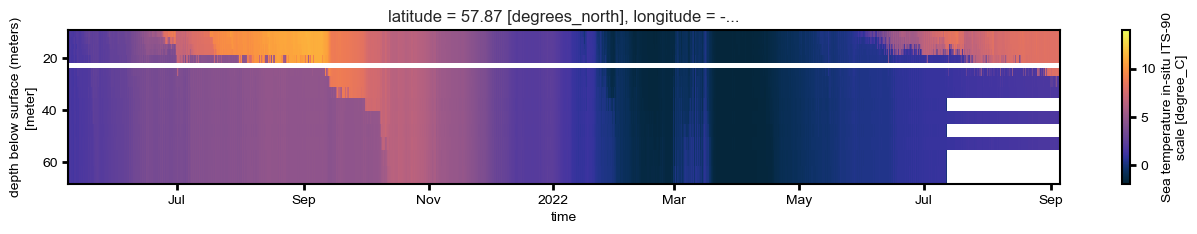

In [22]:
upper_temp = mfd_up.temperature.max(axis=0).max(axis=0).values
lower_temp = -2

fig, ax = plt.subplots(1,figsize=(16, 2))
mfd_up.temperature.T.plot(ax=ax,yincrease=False,vmin=lower_temp,vmax=14,cmap=cmocean.cm.thermal)

## Chlorophyll Hourly Interpolated Plots

In [ ]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd_up.chlor_fluorescence.plot(x="time",hue="depth",ax=ax);
(mfd_up.chlor_fluorescence*0).plot(x="time",hue="depth",ax=ax,add_legend=False);

In [ ]:
upper = 50
lower = 0

fig, ax = plt.subplots(1,figsize=(16, 2))
mfd_up.chlor_fluorescence.T.plot(ax=ax,yincrease=False,vmin=lower,vmax=upper,cmap=cmocean.cm.algae)

## Compare Timeseries to CTD Casts



In [24]:
import EcoFOCIpy.io.erddap as erddap

In [25]:
url = "http://ecofoci-field.pmel.noaa.gov:8080/erddap"

erddap.test_erddap_connection(url=url) #basic test for connection to internal server, no response is a good thing

In [26]:
#grap deploy/recover cast data from erddap hosted sets - you have to know which profile you want though
depcast = erddap.erddapCTDretrieve(url=url,cruiseid='dy2103',qclevel='final',concastno='006')
reccast = erddap.erddapCTDretrieve(url=url,cruiseid='dy2206',qclevel='final',concastno='022')

## QC Notes



(PJS needs to vet these)

## Generate to_edit files for PJS

- these are usually salinity focused and need the ctd casts as well as the salinity timeseries.
- save the native time scale, not the interpolated or upscaled version

In [28]:
with pd.ExcelWriter('21bs4a_salinity_to_edit.xlsx') as writer:  

    for depthkey in mfd.to_dataframe().salinity.groupby(level=[3]).groups.keys():
        if not (mfd.to_dataframe().salinity.groupby(level=[3]).get_group(depthkey).dropna(how='all')).empty:
            print(f'saving {depthkey}')
            (mfd.to_dataframe().salinity.groupby(level=[3]).get_group(depthkey).dropna(axis=0)).to_excel(writer, sheet_name=str(depthkey))

    depcast.to_excel(writer, sheet_name=depcast.profile_id.unique()[0])
    reccast.to_excel(writer, sheet_name=reccast.profile_id.unique()[0])

/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_38275/1905988855.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  if not (mfd.to_dataframe().salinity.groupby(level=[3]).get_group(depthkey).dropna(how='all')).empty:


saving 10.5


/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_38275/1905988855.py:6: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  (mfd.to_dataframe().salinity.groupby(level=[3]).get_group(depthkey).dropna(axis=0)).to_excel(writer, sheet_name=str(depthkey))
/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_38275/1905988855.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  if not (mfd.to_dataframe().salinity.groupby(level=[3]).get_group(depthkey).dropna(how='all')).empty:
/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_38275/1905988855.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version 

saving 16.0


/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_38275/1905988855.py:6: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  (mfd.to_dataframe().salinity.groupby(level=[3]).get_group(depthkey).dropna(axis=0)).to_excel(writer, sheet_name=str(depthkey))
/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_38275/1905988855.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  if not (mfd.to_dataframe().salinity.groupby(level=[3]).get_group(depthkey).dropna(how='all')).empty:
/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_38275/1905988855.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version 

saving 29.0


/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_38275/1905988855.py:6: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  (mfd.to_dataframe().salinity.groupby(level=[3]).get_group(depthkey).dropna(axis=0)).to_excel(writer, sheet_name=str(depthkey))
/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_38275/1905988855.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  if not (mfd.to_dataframe().salinity.groupby(level=[3]).get_group(depthkey).dropna(how='all')).empty:
/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_38275/1905988855.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version 

saving 53.0


/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_38275/1905988855.py:6: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  (mfd.to_dataframe().salinity.groupby(level=[3]).get_group(depthkey).dropna(axis=0)).to_excel(writer, sheet_name=str(depthkey))
/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_38275/1905988855.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  if not (mfd.to_dataframe().salinity.groupby(level=[3]).get_group(depthkey).dropna(how='all')).empty:
/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_38275/1905988855.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version 